## Stock Prediction using Linear Regression


The objective of this class is to perform Linear Regression on a dataset of Nifty 50 companies stock turnover for the past year. The goal is to find the accurate prediction for today.


**1. Importing necessary modules**


In [1]:
pip install pandas numpy matplotlib scikit-learn seaborn statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------- -------------------------------- 1.8/9.6 MB 10.0 MB/s eta 0:00:01
   ---------------- ----------------------- 3.9/9.6 MB 9.4 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.6 MB 10.2 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 10.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\tvaru\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**2. Importing the dataset**


In [43]:
df = pd.read_csv("NIFTY 50-11-08-2024-to-11-08-2025.csv")
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,12-AUG-2024,24320.05,24472.80,24212.10,24347.00,279925100,30311.85
1,13-AUG-2024,24342.35,24359.95,24116.50,24139.00,239727640,25459.58
2,14-AUG-2024,24184.40,24196.50,24099.70,24143.75,303254705,27834.61
3,16-AUG-2024,24334.85,24563.90,24204.50,24541.15,271611087,28521.90
4,19-AUG-2024,24636.35,24638.80,24522.95,24572.65,243645503,22124.41


**3. Exploratory Data Analysis**


In [44]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,12-AUG-2024,24320.05,24472.80,24212.10,24347.00,279925100,30311.85
1,13-AUG-2024,24342.35,24359.95,24116.50,24139.00,239727640,25459.58
2,14-AUG-2024,24184.40,24196.50,24099.70,24143.75,303254705,27834.61
3,16-AUG-2024,24334.85,24563.90,24204.50,24541.15,271611087,28521.90
4,19-AUG-2024,24636.35,24638.80,24522.95,24572.65,243645503,22124.41


In [45]:
# Checking for datatypes

df.dtypes

Date                object
Open               float64
High               float64
Low                float64
Close              float64
Shares Traded        int64
Turnover (₹ Cr)    float64
dtype: object

In [46]:
# Checking for missing data

df.isna().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64

In [47]:
df.describe()

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02,249.000000
mean,24265.656024,24378.899598,24138.593173,24257.550201,3.125471e+08,29410.097550
std,929.147347,916.159219,933.388444,922.539753,1.004560e+08,9363.829115
min,21758.400000,22105.050000,21743.650000,22082.650000,3.881139e+07,3348.450000
25%,23543.800000,23689.850000,23433.500000,23532.700000,2.518498e+08,24202.410000
50%,24419.500000,24537.600000,24295.550000,24435.500000,2.875352e+08,27573.990000
75%,24999.400000,25073.100000,24825.900000,24971.300000,3.510820e+08,32606.340000
max,26248.250000,26277.350000,26151.400000,26216.050000,8.538910e+08,89554.910000


In [48]:
# Renaming columns to trim column name

df.columns = [s.strip() for s in df.columns]
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (₹ Cr)'],
      dtype='object')

In [49]:
# Finding correlation between columns

corr = df[df.columns[1:]].corr()
corr

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
Open,1.000000,0.993695,0.993855,0.984911,-0.035828,0.085603
High,0.993695,1.000000,0.992576,0.993785,-0.008416,0.111354
Low,0.993855,0.992576,1.000000,0.993112,-0.048864,0.069563
Close,0.984911,0.993785,0.993112,1.000000,-0.021141,0.094697
Shares Traded,-0.035828,-0.008416,-0.048864,-0.021141,1.000000,0.824444
Turnover (₹ Cr),0.085603,0.111354,0.069563,0.094697,0.824444,1.000000


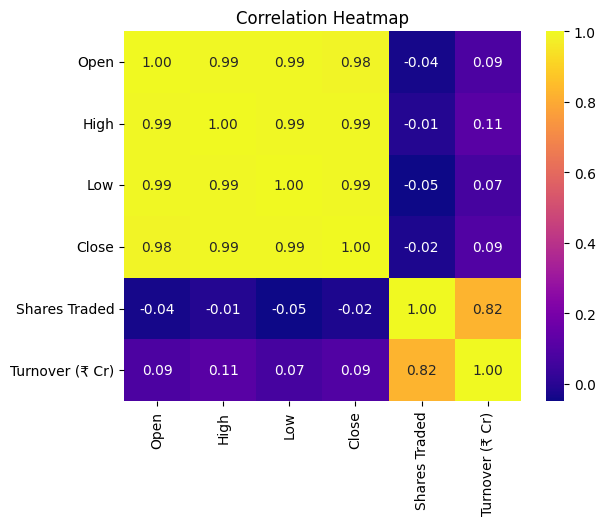

In [50]:
# Plotting correlation using heatmap

sns.heatmap(corr, annot=True, cmap="plasma", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [51]:
# Preprocess the date to a numeric value

import datetime


def date_to_numeric(date_str):
    """Converts a date string to a numeric value."""
    date_obj = datetime.datetime.strptime(date_str, "%d-%b-%Y")
    return date_obj.toordinal()


# Apply the function to the 'Date' column
df["Date"] = df["Date"].apply(date_to_numeric)
print(df)

       Date      Open      High       Low     Close  Shares Traded  \
0    739110  24320.05  24472.80  24212.10  24347.00      279925100   
1    739111  24342.35  24359.95  24116.50  24139.00      239727640   
2    739112  24184.40  24196.50  24099.70  24143.75      303254705   
3    739114  24334.85  24563.90  24204.50  24541.15      271611087   
4    739117  24636.35  24638.80  24522.95  24572.65      243645503   
..      ...       ...       ...       ...       ...            ...   
244  739467  24596.05  24736.25  24554.00  24722.75      259329477   
245  739468  24720.25  24733.10  24590.30  24649.55      251849778   
246  739469  24641.35  24671.40  24539.20  24574.20      225091071   
247  739470  24464.20  24634.20  24344.15  24596.15      616739190   
248  739471  24544.25  24585.50  24337.50  24363.30      312630157   

     Turnover (₹ Cr)  
0           30311.85  
1           25459.58  
2           27834.61  
3           28521.90  
4           22124.41  
..               ... 

In [52]:
# Remove rows with NaN or missing values
df.dropna(inplace=True)

print(df)

       Date      Open      High       Low     Close  Shares Traded  \
0    739110  24320.05  24472.80  24212.10  24347.00      279925100   
1    739111  24342.35  24359.95  24116.50  24139.00      239727640   
2    739112  24184.40  24196.50  24099.70  24143.75      303254705   
3    739114  24334.85  24563.90  24204.50  24541.15      271611087   
4    739117  24636.35  24638.80  24522.95  24572.65      243645503   
..      ...       ...       ...       ...       ...            ...   
244  739467  24596.05  24736.25  24554.00  24722.75      259329477   
245  739468  24720.25  24733.10  24590.30  24649.55      251849778   
246  739469  24641.35  24671.40  24539.20  24574.20      225091071   
247  739470  24464.20  24634.20  24344.15  24596.15      616739190   
248  739471  24544.25  24585.50  24337.50  24363.30      312630157   

     Turnover (₹ Cr)  
0           30311.85  
1           25459.58  
2           27834.61  
3           28521.90  
4           22124.41  
..               ... 

**4. Splitting dataset**


In [53]:
X = df.drop("Close", axis=1)
y = df["Close"]

In [76]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**5. Training the model**


In [77]:
LR = LinearRegression()

LR.fit(x_train, y_train)

LinearRegression()

In [78]:
# Find the most significant predictor

# Get the coefficients of the model
coefficients = LR.coef_

# Create a DataFrame to display coefficients with corresponding features
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficients})

# Sort the DataFrame by the absolute value of the coefficients
feature_importance = feature_importance.reindex(
    feature_importance["Coefficient"].abs().sort_values(ascending=False).index
)

print(feature_importance)

           Feature   Coefficient
2             High  9.148436e-01
3              Low  7.650857e-01
1             Open -6.838803e-01
0             Date  4.310180e-02
5  Turnover (₹ Cr) -2.491026e-04
4    Shares Traded  3.797483e-08


**7. Evaluating the model**


In [79]:
LR.score(x_test, y_test)

0.9937989057609994

In [80]:
# Make predictions using the training set
y_train_pred = LR.predict(x_train)

# Calculate the training accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

train_r2_score = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"Training Accuracy (R-squared): {train_r2_score}")
print(f"Training Accuracy (Mean Squared Error): {train_mse}")
print(f"Training Accuracy (Mean Absolute Error): {train_mae}")

Training Accuracy (R-squared): 0.9950042656732535
Training Accuracy (Mean Squared Error): 4290.820716609954
Training Accuracy (Mean Absolute Error): 48.776861272290155


In [81]:
# Make predictions using the test set
y_test_pred = LR.predict(x_test)

test_r2_score = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Test Accuracy (R-squared): {test_r2_score}")
print(f"Test Accuracy (Mean Squared Error): {test_mse}")
print(f"Test Accuracy (Mean Absolute Error): {test_mae}")

Test Accuracy (R-squared): 0.9937989057609994
Test Accuracy (Mean Squared Error): 4961.436906509695
Test Accuracy (Mean Absolute Error): 52.822012994979374


In [86]:
X_with_const = sm.add_constant(X)

# Fit OLS regression
model = sm.OLS(y, X_with_const).fit()

# Extract table data
table = pd.DataFrame(
    {
        "Feature": model.params.index,
        "Coefficient": model.params.values,
        "Std. Error": model.bse.values,
        "t-Statistic": model.tvalues.values,
        "p-Value": model.pvalues.values,
    }
)

print(table)

           Feature   Coefficient    Std. Error  t-Statistic       p-Value
0            const -2.076792e+04  3.675391e+04    -0.565053  5.725609e-01
1             Date  2.817123e-02  4.972886e-02     0.566497  5.715812e-01
2             Open -6.833581e-01  4.935834e-02   -13.844837  1.693884e-32
3             High  8.868614e-01  4.824287e-02    18.383263  7.897760e-48
4              Low  7.937408e-01  4.697328e-02    16.897708  7.778273e-43
5    Shares Traded  2.529901e-09  9.393088e-08     0.026934  9.785349e-01
6  Turnover (₹ Cr) -1.418364e-05  9.912460e-04    -0.014309  9.885953e-01


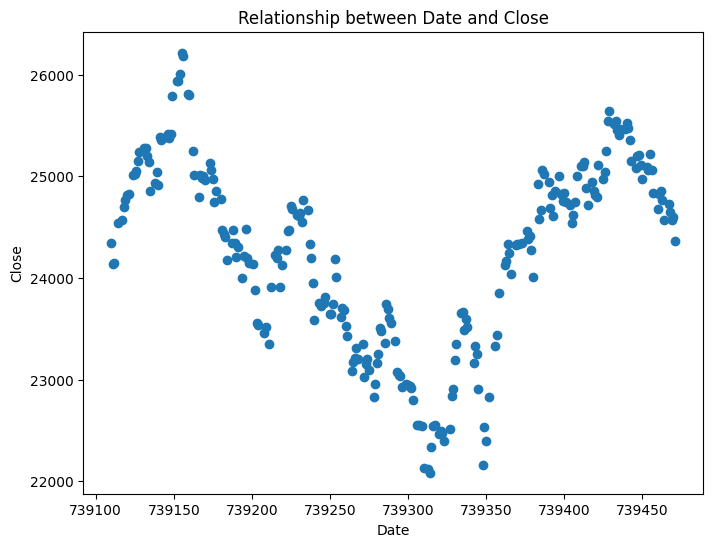

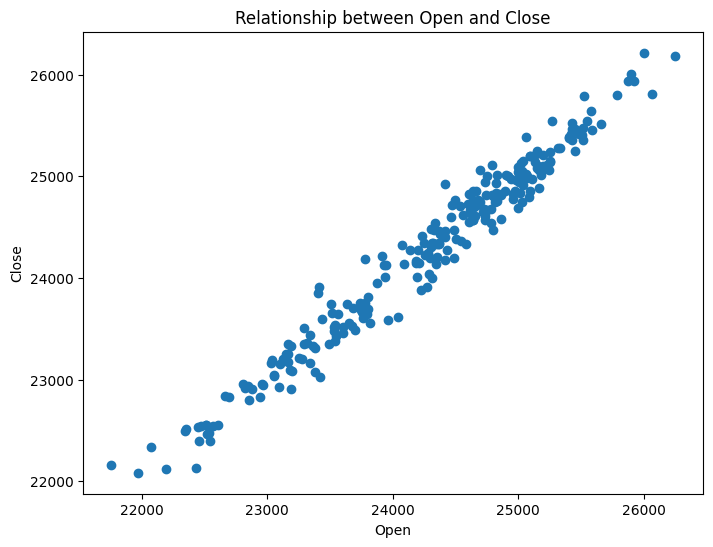

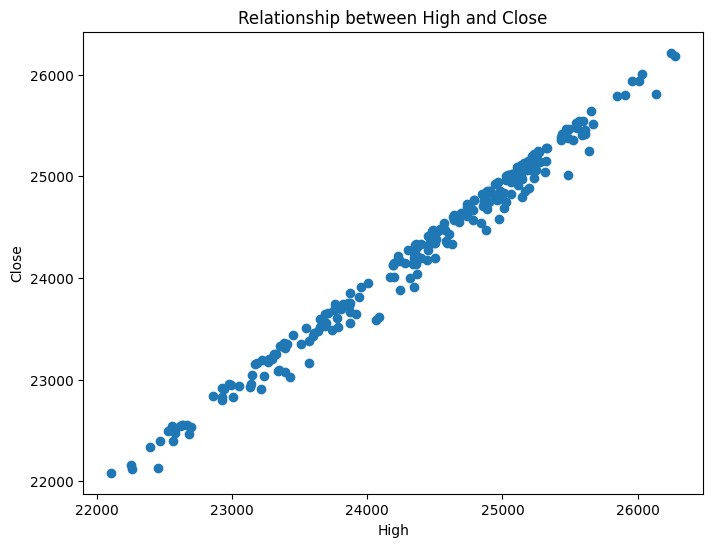

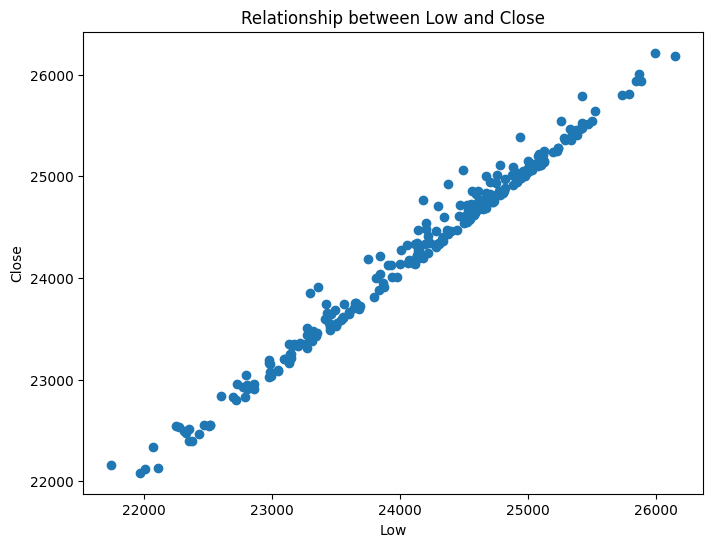

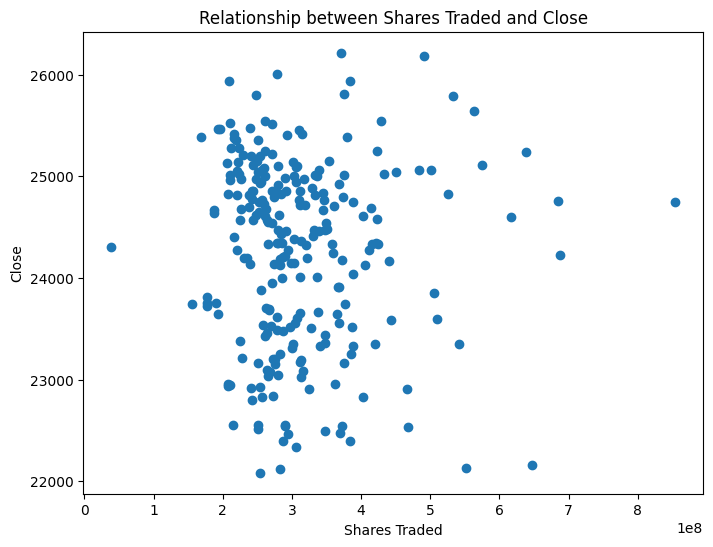

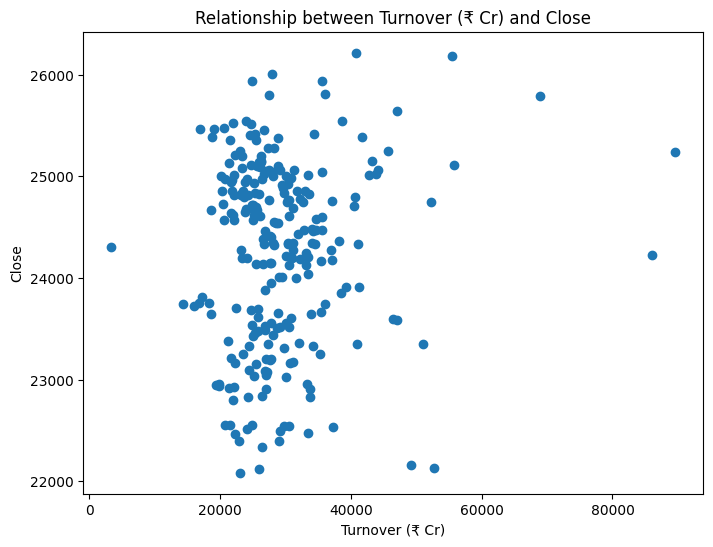

In [83]:
# Plot between each predictor and the response

import matplotlib.pyplot as plt

# Iterate over each predictor
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df["Close"])
    plt.xlabel(feature)
    plt.ylabel("Close")
    plt.title(f"Relationship between {feature} and Close")
    plt.show()

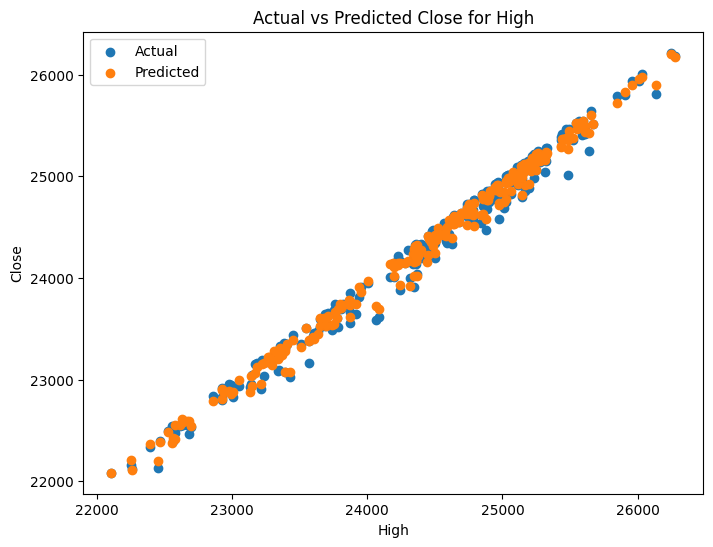

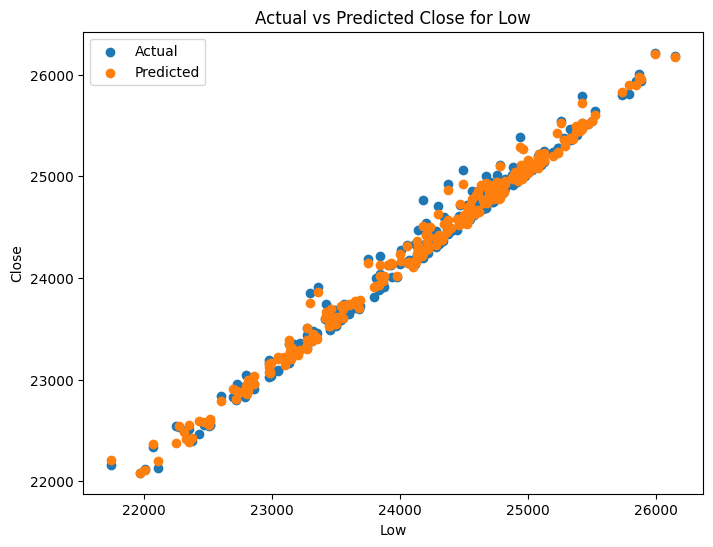

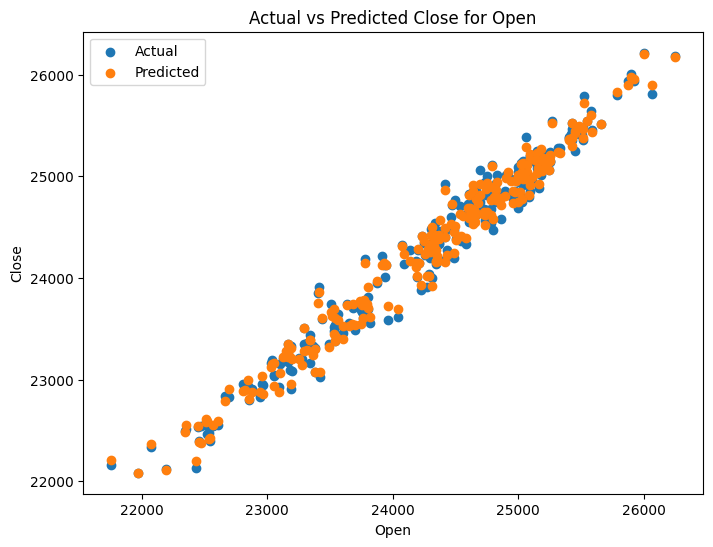

In [84]:
# Plot the actual value and the predicted value for the close for each feature

# Plot the actual value and the predicted value for the close for each feature
for feature in x.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df["Close"], label="Actual")
    plt.scatter(df[feature], LR.predict(X), label="Predicted")
    plt.xlabel(feature)
    plt.ylabel("Close")
    plt.title(f"Actual vs Predicted Close for {feature}")
    plt.legend()
    plt.show()

**4. Making Predictions**


In [85]:
# Use today for date and yesterday's close for today's open and other values being the same yesterday's value predict the new closing value

# Get the last row of the dataframe
last_row = df.iloc[-1]

# Get the last date and add 1 to it
last_date = last_row["Date"] + 1

# Create a new dataframe with the last date and previous values
new_data = pd.DataFrame(
    {
        "Date": [last_date],
        "Open": [last_row["Close"]],  # Use previous close as open
        "High": [last_row["High"]],
        "Low": [last_row["Low"]],
        "Shares Traded": [last_row["Shares Traded"]],
        "Turnover (₹ Cr)": [last_row["Turnover (₹ Cr)"]],
    }
)

# Predict the close value for the new data
predicted_close = LR.predict(new_data)

print(f"Predicted close value for the next day: {predicted_close[0]}")

Predicted close value for the next day: 24539.454759164957
